# WIRC+Pol Modulation Sequence Tutorial #

This tutorial is to show you how to reduce WIRC+Pol data obtained after March 2019 using the new awesome modulator to obtain q,u,p and theta. 

In this tutorial we assume that you have already been through the two other tutorials, named WIRC+Pol_Single_File_Tutorial and WIRC+Pol_Dataset_Reduction_Tutorial. These tutorials will touch on installation and give you a good instroduction as to formats of WIRC+Pol data. 

Here we assume that you already have run the pipeline to extract spectra on a dataset, but have yet to combine them via single differencing (in time) or double-differencing. 

In [1]:
import numpy as np
import glob
import wirc_drp.wirc_object as wo
from wirc_drp.utils import source_utils
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

### Read in the files - Tutorial Dataset ###

For the purpose of this tutorial, we are providing you with spectra and hwp angles in .np files. That we read in here. Below we show a commented out example of how you would get these same inputs from a WIRC+Pol dataset.

We assume here that the group of spectra have already been aligned (see the Dataset tutorial). 

In [2]:
all_spec_cube = np.load("sample_data/Elia2-14_HWP_Spectra.npy")
hwp_ang = np.load("sample_data/Elia2-14_HWP_Angles.npy")
nfiles = all_spec_cube.shape[0]

### Read in the files - Normal Operations ###

The following three commented out boxes give you an example of how to read in the data for this tutorial from normal wircpol_object fits files. You would do something like this when reducing your own data. 


In [3]:
### Read in the files. 
#fnames = np.sort(glob.glob("/path_to_your_files_here/*.fits"))
#nfiles = len(fnames)
#print("Found {} files".format(nfiles))

In [4]:
### Read in the first one to get the spectra size
#test= wo.wirc_data(wirc_object_filename=fnames[0],verbose=False)

### Create a list to read the spectra into
# all_spec_cube = []

### And the HWP angles
#hwp_ang = np.zeros([nfiles])
#time = np.zeros([nfiles])

In [5]:
# all_spec_cube = []
# for im in np.arange(nfiles):
#     wirc_object = wo.wirc_data(wirc_object_filename=fnames[im],verbose=False)
#     wirc_object.source_list[0].get_broadband_polarization(mode="aperture_photometry")
#     hwp_ang[im] = wirc_object.header['HWP_ANG']
    
#     #Shift the spectra to the side because of the filter tilt. 
#     #The value of -3 used here might not be ideal, but we'll see. 
#     spectra[im,1,:] = np.roll(spectra[im,1,:],-3)
#     spectra[im,3,:] = np.roll(spectra[im,3,:],-3)
    
#     wirc_object.source_list[0].trace_spectra[1,1,:] = np.roll(wirc_object.source_list[0].trace_spectra[1,1,:],-3)
#     wirc_object.source_list[0].trace_spectra[3,1,:] = np.roll(wirc_object.source_list[0].trace_spectra[3,1,:],-3)
    
#     all_spec_cube.append(wirc_object.source_list[0].trace_spectra)

# all_spec_cube = np.array(all_spec_cube)

## Plot the spectra and make sure they're aligned and ready to go

(-2000, 30000)

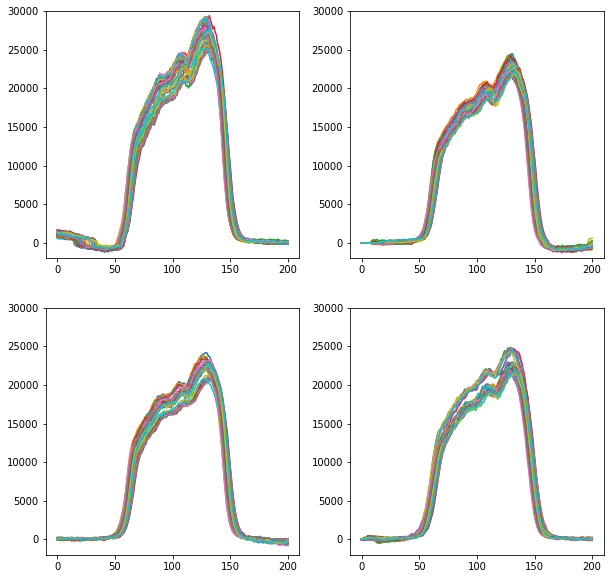

In [6]:
fig,axes = plt.subplots(2,2,figsize=(10,10))

for im in np.arange(nfiles):
    axes[0,0].plot(all_spec_cube[im,0,1,:])
    axes[0,1].plot(all_spec_cube[im,1,1,:])
    axes[1,0].plot(all_spec_cube[im,2,1,:])
    axes[1,1].plot(all_spec_cube[im,3,1,:])

axes[0,0].set_ylim(-2000,30000)
axes[0,1].set_ylim(-2000,30000)
axes[1,0].set_ylim(-2000,30000)
axes[1,1].set_ylim(-2000,30000)

Things look good here, so let's move on. If the spectra aren't aligned, then go back to the last tutorial and remind yourself how to align a spectral cube. 

## Calculate _q_ and _u_ using single differencing in time for each trace. 

Here we create an array of _q_ and _u_ by first doing a single difference of each trace in time. The following function automatically sorts the input data based on the HWP angles that you pass to it and subtracts the appropriate spectra from each other (i.e. 45 degrees from 0 degrees, and 67.5 degrees from 22.5 degrees).

In [7]:
q,u,q_err,u_err,q_ind,u_ind = source_utils.compute_qu_for_obs_sequence(all_spec_cube,hwp_ang,run_alignment=True, method='flux_ratio')

The _q_ and _u_ arrays that are output contain the _q_ and _u_ measurements from all four traces. 
The dimensions are [n_measurements,wavelength]. To know which pair of traces a given n_measurements index corresponds to, you have to look at the q_ind parameter. 

In [8]:
q.shape

(20, 201)

### Now calculate _p_ and _$\theta$_

In [9]:
p = np.sqrt(q**2+u**2)
theta = 0.5*np.degrees(np.arctan2(u,q))
theta[theta<0] += 180

### Now we can plot our results

(0, 180)

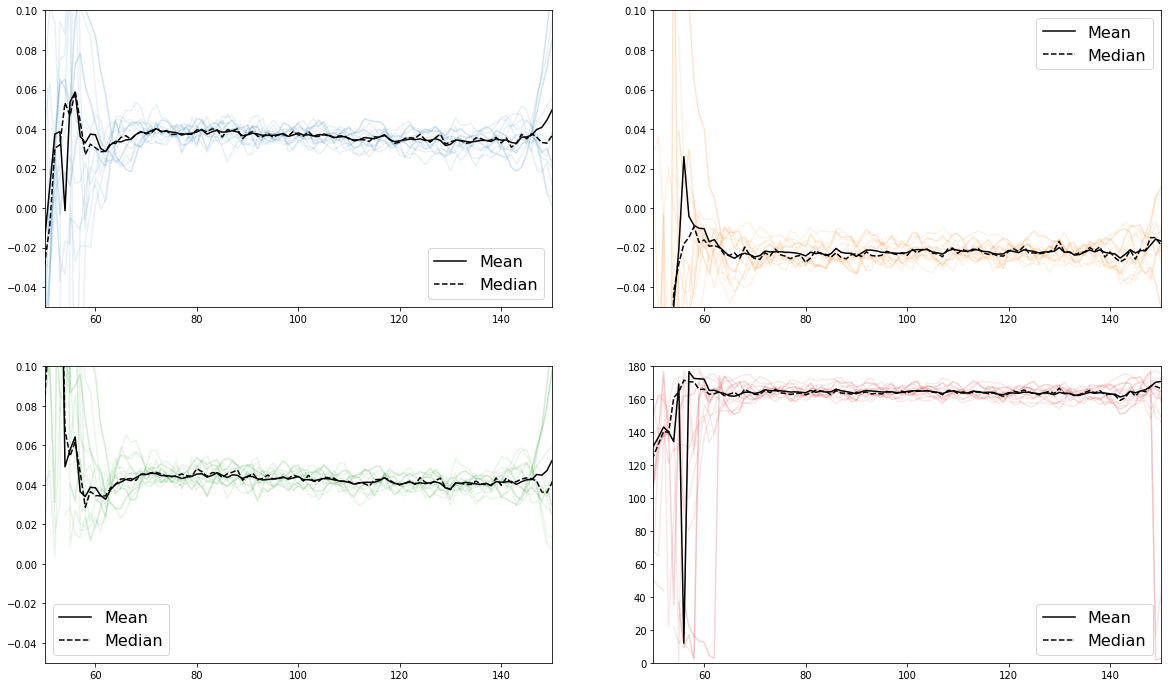

In [10]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

n_q = q.shape[0]

q_mean = np.nanmean(q[:15,:],axis=(0))
u_mean = np.nanmean(u[:15,:],axis=(0))
p_mean = np.sqrt(q_mean**2+u_mean**2)
theta_mean = 0.5*np.degrees(np.arctan2(u_mean,q_mean))
theta_mean[theta_mean<0] += 180


q_median = np.nanmedian(q[:15,:],axis=(0))
u_median = np.nanmedian(u[:15,:],axis=(0))
p_median = np.sqrt(q_median**2+u_median**2)
theta_median = 0.5*np.degrees(np.arctan2(u_median,q_median))
theta_median[theta_median<0] += 180

for i in range(15):
    #Plot Q
    axes[0,0].plot(q[i,:], 'C0', alpha=2/n_q)
    
    #Plot U
    axes[0,1].plot(u[i,:], 'C1', alpha=2/n_q)
    
    #Plot p
    axes[1,0].plot(p[i,:], 'C2', alpha=2/n_q)

    #Plot theta
    axes[1,1].plot(theta[i,:], 'C3', alpha=2/n_q)

axes[0,0].plot(q_mean,'k',label="Mean")    
axes[0,1].plot(u_mean,'k',label="Mean")   
axes[1,0].plot(p_mean,'k',label="Mean")
axes[1,1].plot(theta_mean,'k', label='Mean')

axes[0,0].plot(q_median,'k--',label="Median")    
axes[0,1].plot(u_median,'k--',label="Median")    
axes[1,0].plot(p_median,'k--',label="Median")    
axes[1,1].plot(theta_median,'k--',label="Median")

axes[0,0].legend(fontsize=16)
axes[0,1].legend(fontsize=16)
axes[1,0].legend(fontsize=16)
axes[1,1].legend(fontsize=16)

axes[0,0].set_xlim(50,150)
axes[0,1].set_xlim(50,150)
axes[1,0].set_xlim(50,150)
axes[1,1].set_xlim(50,150)

axes[0,0].set_ylim(-0.05,.1)
axes[0,1].set_ylim(-0.05,.1)
axes[1,0].set_ylim(-0.05,.1)
axes[1,1].set_ylim(0,180)

NOTE: The double differencing seems to already be done inside the source_utils.compute_qu_for_obs_sequence() function, so we don't need to worry about that here. Previously the shape of q was (20, 2, 201), where the second dimension was the two different trace pairs (UL+LR, UR+LL), and you would have to manually double difference these in order to get a clean q and u signal out, but since that's already taken care of inside the pipeline, we can just enjoy the pretty plots.